In [ ]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore' )

In [ ]:
df = pd.read_excel('/content/flight_price.xlsx')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
df.shape

(10683, 11)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(10682, 11)

In [ ]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.drop(['Route','Additional_Info'],axis = 1,inplace = True)

In [ ]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [ ]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,01,03,2019


In [ ]:
df.drop(['Date_of_Journey'],axis = 1,inplace = True)

In [ ]:
df.dtypes

Airline         object
Source          object
Destination     object
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
Price            int64
Date            object
month           object
year            object
dtype: object

In [ ]:
df['Date'] = df['Date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df.dtypes

Airline         object
Source          object
Destination     object
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
Price            int64
Date             int64
month            int64
year             int64
dtype: object

In [ ]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,month,year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,2019


In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
data = {
    'non-stop' : 0,
    '1 stop' :  1,
    '2 stops' : 2,
    '3 stops' : 3,
    '4 stops' : 4,
}

# df['Total_Stops'] = df['Total_Stops'].map(data)

In [ ]:
df['Total_Stops'] = df['Total_Stops'].map(data)

In [ ]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
df.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,month,year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5,2019


In [ ]:
df['Departure_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_min'] =df['Dep_Time'].str.split(':').str[1]

In [ ]:
df.head(10)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3,2019,16,50
5,SpiceJet,Kolkata,Banglore,09:00,11:25,2h 25m,0,3873,24,6,2019,09,00
6,Jet Airways,Banglore,New Delhi,18:55,10:25 13 Mar,15h 30m,1,11087,12,3,2019,18,55
7,Jet Airways,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1,22270,1,3,2019,08,00
8,Jet Airways,Banglore,New Delhi,08:55,10:25 13 Mar,25h 30m,1,11087,12,3,2019,08,55
9,Multiple carriers,Delhi,Cochin,11:25,19:15,7h 50m,1,8625,27,5,2019,11,25


In [ ]:
df['Departure_min'] = df['Departure_min'].astype(int)
df['Departure_hour'] = df['Departure_hour'].astype(int)
df.drop('Dep_Time',axis  = 1,inplace = True)

In [ ]:
df['arrival_hour'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['arrival_min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis = 1, inplace  = True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,22,20,01,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,9,25,04,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,16,50,21,35


In [ ]:
df['arrival_hour'] = df['arrival_hour'].astype(int)
df['arrival_min'] =  df['arrival_min'].astype(int)
df.dtypes

Airline           object
Source            object
Destination       object
Duration          object
Total_Stops        int64
Price              int64
Date               int64
month              int64
year               int64
Departure_hour     int64
Departure_min      int64
arrival_hour       int64
arrival_min        int64
dtype: object

In [ ]:
df['Duration_hours'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min'] =  df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,2019,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df['Duration_min'].fillna(0,inplace = True)


In [ ]:
df.drop('Duration',axis = 1, inplace  = True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df['Duration_hours'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
41       1
40       1
Name: Duration_hours, dtype: int64

In [ ]:
df_filtered = df[df['Duration_hours'] != '5m']
df_filtered.head()

,Airline,Source,Destination,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df_filtered.shape

(10681, 14)

In [ ]:
df_filtered['Duration_min'] = df_filtered['Duration_min'].astype(int)
df_filtered['Duration_hours'] = df_filtered['Duration_hours'].astype(int)
df_filtered.dtypes

Airline           object
Source            object
Destination       object
Total_Stops        int64
Price              int64
Date               int64
month              int64
year               int64
Departure_hour     int64
Departure_min      int64
arrival_hour       int64
arrival_min        int64
Duration_hours     int64
Duration_min       int64
dtype: object

In [ ]:
df_filtered['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
df_filtered['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df_filtered['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
airlines = {'IndiGo': 0,
            'Air India' :1,
            'Jet Airways':2,
            'SpiceJet':3,
            'Multiple carriers': 4,
            'GoAir': 5,
            'Vistara' : 6,
            'Air Asia': 7 ,
            'Vistara Premium economy': 8,
            'Jet Airways Business' : 9,
            'Multiple carriers Premium economy' : 10,
            'Trujet' :11}


df_filtered['Airline'] = df_filtered['Airline'].map(airlines)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
# df_filtered['Airline'] = pd.DataFrame(encoder.fit_transform(df['Airline']))
df_filtered['Source'] = pd.DataFrame(encoder.fit_transform(df['Source']))
df_filtered['Destination'] = pd.DataFrame(encoder.fit_transform(df['Destination']))


In [ ]:
df_filtered.dtypes

Airline             int64
Source            float64
Destination       float64
Total_Stops         int64
Price               int64
Date                int64
month               int64
year                int64
Departure_hour      int64
Departure_min       int64
arrival_hour        int64
arrival_min         int64
Duration_hours      int64
Duration_min        int64
dtype: object

In [ ]:
df_filtered.head()

,Airline,Source,Destination,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
0,0,0.0,5.0,0,3897,24,3,2019,22,20,1,10,2,50
1,1,3.0,0.0,2,7662,1,5,2019,5,50,13,15,7,25
2,2,2.0,1.0,2,13882,9,6,2019,9,25,4,25,19,0
3,0,3.0,0.0,1,6218,12,5,2019,18,5,23,30,5,25
4,0,0.0,5.0,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df_filtered.isnull().sum()

Airline           0
Source            1
Destination       1
Total_Stops       0
Price             0
Date              0
month             0
year              0
Departure_hour    0
Departure_min     0
arrival_hour      0
arrival_min       0
Duration_hours    0
Duration_min      0
dtype: int64

In [ ]:
df_filtered.shape

(10681, 14)

In [ ]:
df_filtered.dropna(inplace  = True)
df_filtered.shape

(10680, 14)

In [ ]:
df_filtered.head()

,Airline,Source,Destination,Total_Stops,Price,Date,month,year,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
0,0,0.0,5.0,0,3897,24,3,2019,22,20,1,10,2,50
1,1,3.0,0.0,2,7662,1,5,2019,5,50,13,15,7,25
2,2,2.0,1.0,2,13882,9,6,2019,9,25,4,25,19,0
3,0,3.0,0.0,1,6218,12,5,2019,18,5,23,30,5,25
4,0,0.0,5.0,1,13302,1,3,2019,16,50,21,35,4,45


In [ ]:
df_filtered.duplicated().sum()

175

In [ ]:
df_filtered['year'].unique()

array([2019])

In [ ]:
df_filtered.drop('year',axis = 1 , inplace = True)

In [ ]:
df_filtered.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'month', 'Departure_hour', 'Departure_min', 'arrival_hour',
       'arrival_min', 'Duration_hours', 'Duration_min'],
      dtype='object')

<Axes: >

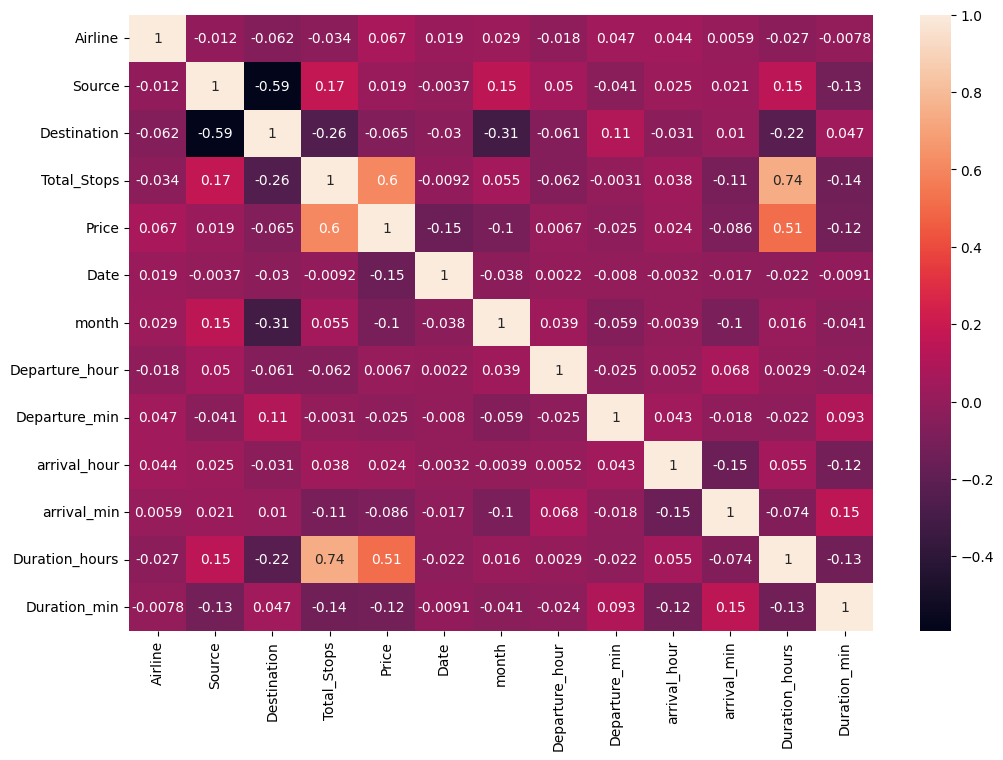

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df_filtered.corr(),annot =True)

In [ ]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
# dataset have?
df.shape

(10682, 14)

In [ ]:
df_filtered.head()

,Airline,Source,Destination,Total_Stops,Price,Date,month,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
0,0,0.0,5.0,0,3897,24,3,22,20,1,10,2,50
1,1,3.0,0.0,2,7662,1,5,5,50,13,15,7,25
2,2,2.0,1.0,2,13882,9,6,9,25,4,25,19,0
3,0,3.0,0.0,1,6218,12,5,18,5,23,30,5,25
4,0,0.0,5.0,1,13302,1,3,16,50,21,35,4,45


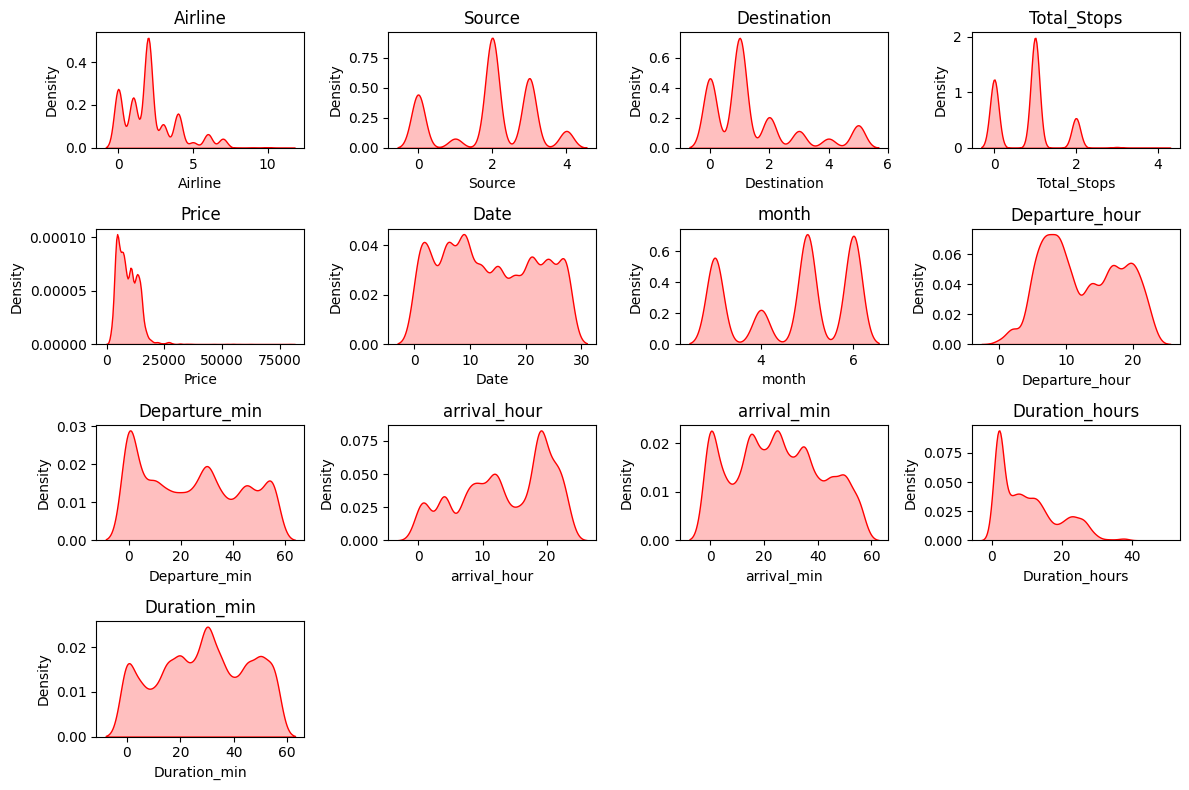

In [ ]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.
plt.figure(figsize=(12,8))
for i, column in enumerate(df_filtered.columns):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df_filtered[column], color='r', fill=True)
    plt.title(column)


plt.tight_layout()


In [ ]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

print(f"The price ranges from  {df_filtered['Price'].min()} to  {df_filtered['Price'].max()}")
print(f"The range is  {df_filtered['Price'].max() - df_filtered['Price'].min()}")


The price ranges from  1759 to  79512
The range is  77753


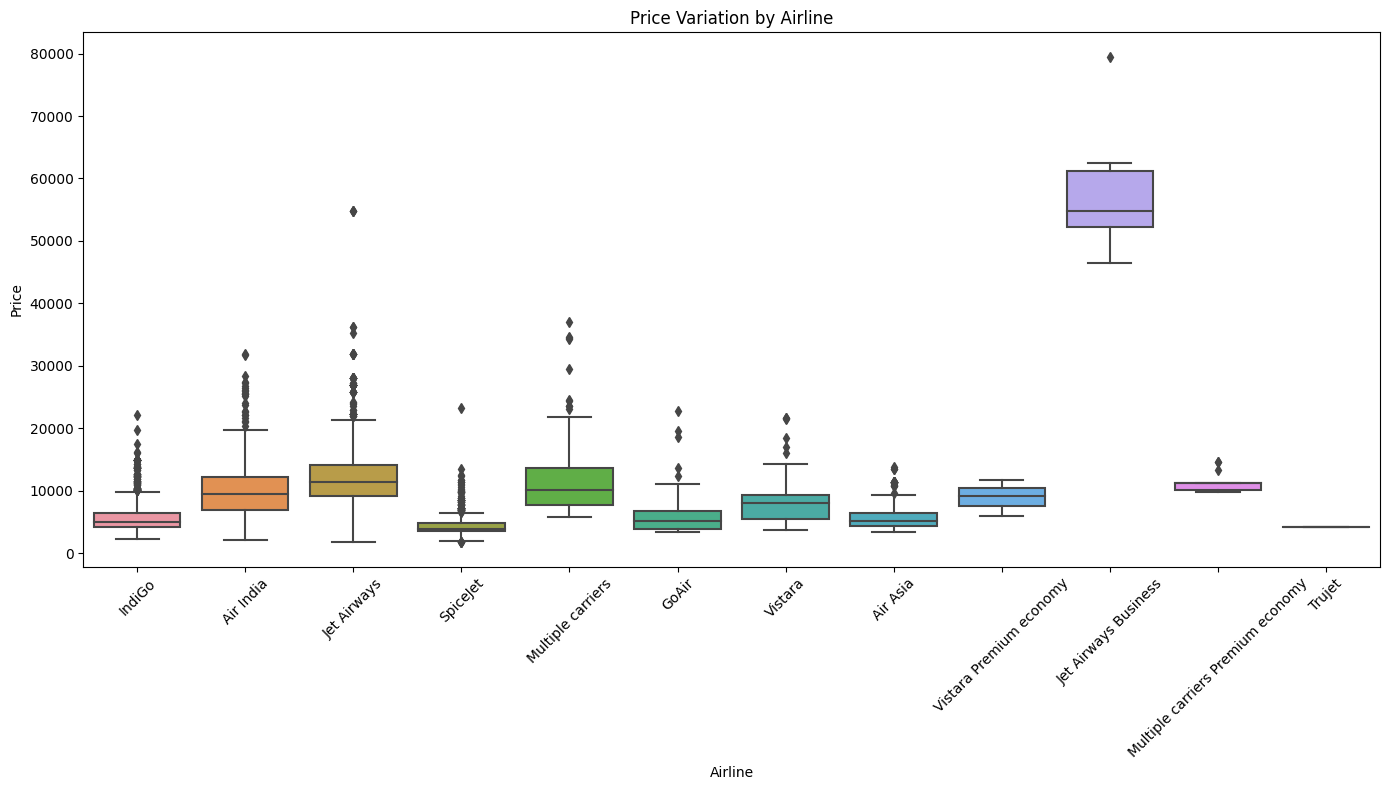

In [ ]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
# airlines.
plt.figure(figsize=(14, 8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price Variation by Airline')
plt.tight_layout()
plt.show()


In [ ]:
# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
# they may impact your analysis.

columns_for_boxplot = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'month', 'Departure_hour', 'Departure_min', 'arrival_hour',
       'arrival_min', 'Duration_hours', 'Duration_min']

num_columns = len(columns_for_boxplot)

num_rows = (num_columns - 1) // 2 + 1

print(num_columns,num_rows)

13 7


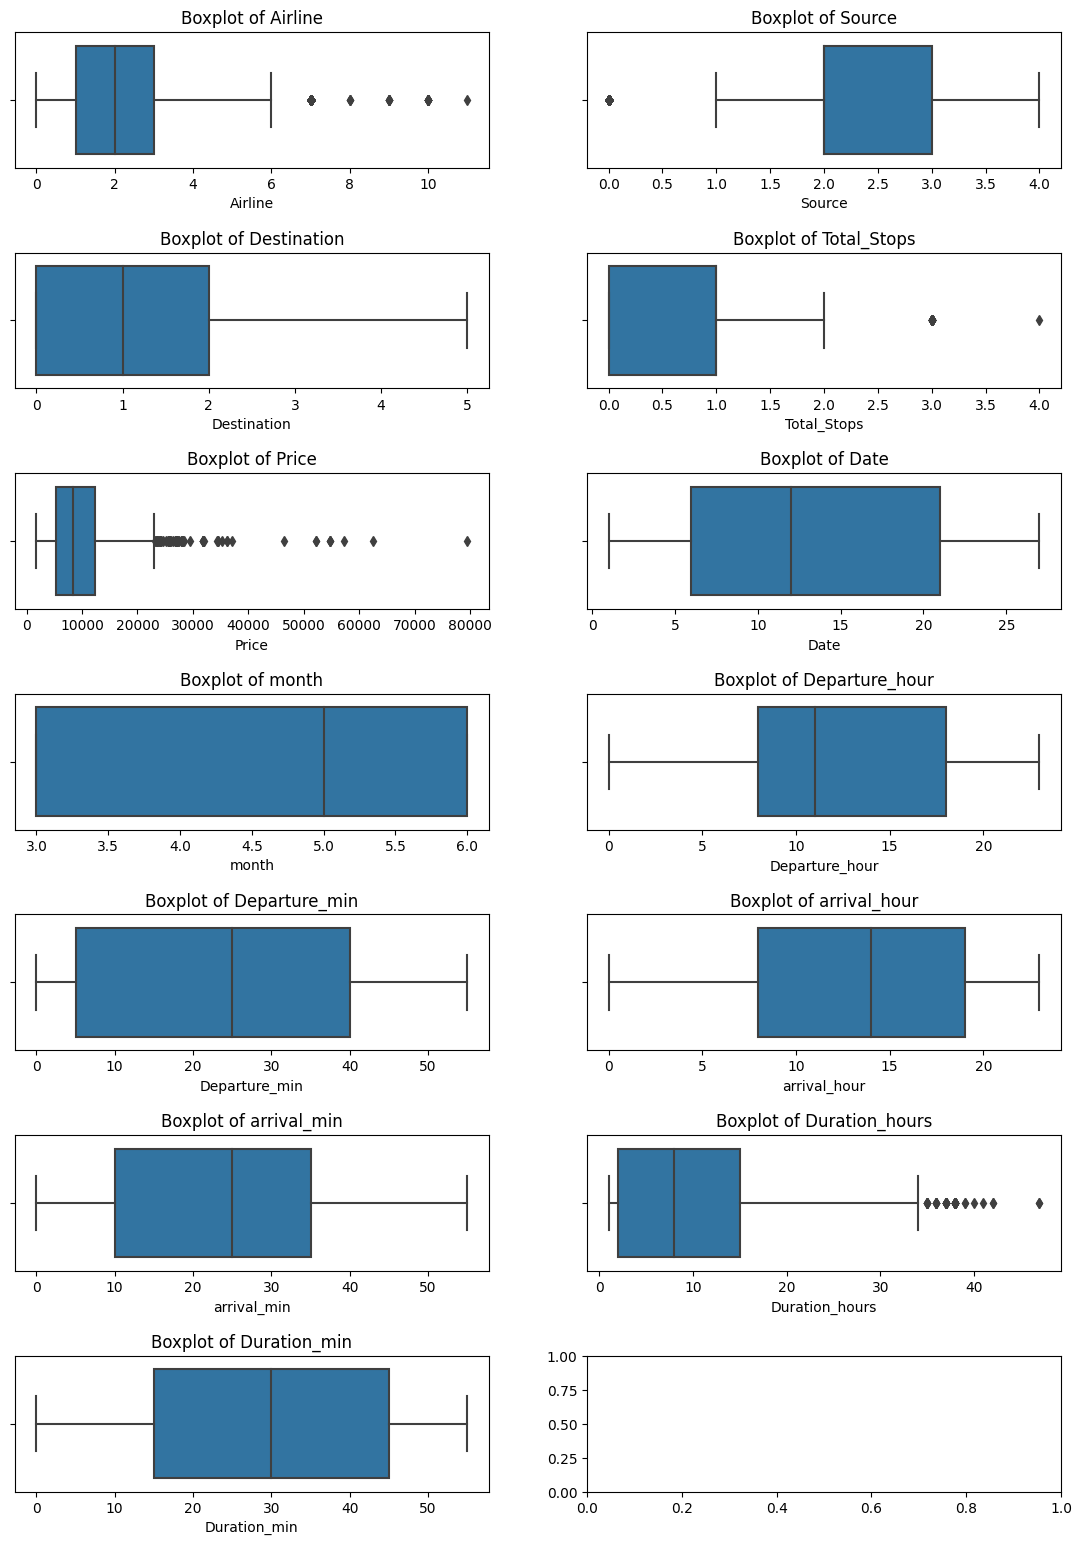

In [ ]:
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 16))
fig.tight_layout(pad=4.0)

# Create boxplots using a for loop
for i, column in enumerate(columns_for_boxplot):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col], data=df_filtered, x=column)
    axes[row, col].set_title(f'Boxplot of {column}')


plt.show()


<Axes: >

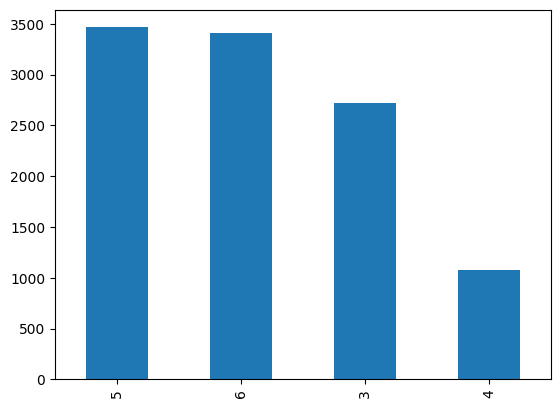

In [ ]:
# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
# to identify the peak travel season. What features would you analyze to identify the peak season, and how
# would you present your findings to your boss?
df['month'].value_counts().plot(kind = 'bar')

# Observation
**This graph shows that people only travel in march , april , may ,June  .**
People travel mostly in summer season

In [ ]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'Date',
       'month', 'year', 'Departure_hour', 'Departure_min', 'arrival_hour',
       'arrival_min', 'Duration_hours', 'Duration_min'],
      dtype='object')

In [ ]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?


# To identify trends in flight prices using the given Flight Price dataset, I would analyze the features that could potentially influence price variations. Here's an approach on the features to analyze and the visualizations to use for presenting findings to the team:

# **Features to Analyze:**
# 1. **Date, Month, and Year:** Analyze how flight prices vary over different dates, months, and years to identify any seasonal trends.
# 2. **Airline:** Explore price differences among different airlines. Certain airlines might consistently offer higher or lower prices.
# 3. **Source and Destination:** Investigate how prices differ based on the source and destination locations.
# 4. **Total Stops:** Check if flight prices increase with the number of stops, as flights with fewer stops might be more expensive.
# 5. **Departure and Arrival Times:** Examine whether flight prices vary based on departure and arrival times, as certain times of the day could be more expensive.
# 6. **Duration:** Analyze the impact of flight duration on prices. Longer flights might have higher prices.

# **Visualizations to Use:**
# 1. **Line Plot by Date, Month, and Year:**
#    - Create line plots showing how average prices change over time. Each plot can focus on a specific aspect, such as day, month, or year.
#    - X-axis: Date, Month, or Year
#    - Y-axis: Average Price
#    - Multiple lines for different years or months can be plotted for comparison.

# 2. **Box Plots by Airline:**
#    - Use box plots to visualize the distribution of prices for each airline.
#    - X-axis: Airline
#    - Y-axis: Price
#    - This visualization can help identify airlines with consistently higher or lower prices.

# 3. **Bar Plots for Source and Destination:**
#    - Create bar plots to compare average prices based on the source and destination locations.
#    - X-axis: Source or Destination
#    - Y-axis: Average Price
#    - Separate bars can represent different source or destination locations.

# 4. **Bar Plots for Total Stops:**
#    - Visualize how flight prices change based on the number of stops using bar plots.
#    - X-axis: Total Stops
#    - Y-axis: Average Price

# 5. **Heatmap for Departure and Arrival Times:**
#    - Create a heatmap to show how prices vary across different departure and arrival times.
#    - X-axis: Departure Hour
#    - Y-axis: Arrival Hour
#    - Color-coding can represent price ranges.

# 6. **Scatter Plot for Duration vs. Price:**
#    - Use scatter plots to examine the relationship between flight duration and price.
#    - X-axis: Duration (hours)
#    - Y-axis: Price
#    - Each point represents a flight.

# 7. **Time Series Decomposition:**
#    - Perform time series decomposition to identify seasonal, trend, and residual components in flight prices over time.
#    - This can help reveal underlying patterns in price fluctuations.

# 8. **Correlation Heatmap:**
#    - Create a correlation heatmap to visualize the relationships between numerical features (e.g., Price, Total_Stops, Departure_hour, Duration_hours, etc.).
#    - This can help identify which features are most strongly correlated with price.



Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In our analysis of the Flight Price dataset, we focused on understanding the factors that have an impact on flight prices. By examining the correlation matrix, we were able to identify several features that show significant relationships with the flight prices. Let's discuss the key findings:

Total Stops (0.604):

The number of stops in a flight shows the highest positive correlation with flight prices. As the number of stops increases, the flight prices tend to rise.
This suggests that non-direct flights or flights with layovers generally have higher prices compared to direct flights.
Duration (0.509 for Duration_hours, -0.125 for Duration_min):

The total duration of the flight, especially in terms of hours, is positively correlated with flight prices. Longer flights are associated with higher prices.
Interestingly, the correlation with the duration in minutes is negative, indicating that shorter flight durations lead to higher prices.
Month (-0.309):

The month of travel displays a negative correlation with flight prices. As the month number increases, prices tend to decrease.
This suggests that certain months might be more cost-effective for travelers.
Airline (0.067):

While the correlation with airlines is relatively low, it still indicates that the choice of airline plays a role in price determination.
Some airlines might consistently offer slightly higher or lower prices compared to others.
Source (-0.065) and Destination (-0.062):

Both the source and destination locations display negative correlations with flight prices.
This indicates that the selection of the departure and arrival cities can influence prices, with certain locations offering more affordable options.
Departure and Arrival Times (0.044 and 0.024):

The departure and arrival times have positive correlations with flight prices, though the correlations are not very strong.
This suggests that flights during certain times of the day might be associated with slightly higher prices.

In [ ]:
df_filtered.corr()

,Airline,Source,Destination,Total_Stops,Price,Date,month,Departure_hour,Departure_min,arrival_hour,arrival_min,Duration_hours,Duration_min
Airline,1.000000,-0.011779,-0.062105,-0.033625,0.067170,0.019409,0.028711,-0.017547,0.046863,0.044188,0.005911,-0.026736,-0.007809
Source,-0.011779,1.000000,-0.592865,0.171423,0.018967,-0.003694,0.153082,0.049814,-0.041075,0.025075,0.020919,0.146400,-0.125287
Destination,-0.062105,-0.592865,1.000000,-0.255638,-0.065364,-0.029785,-0.309898,-0.061105,0.107981,-0.030641,0.010058,-0.222979,0.047186
Total_Stops,-0.033625,0.171423,-0.255638,1.000000,0.603782,-0.009223,0.054603,-0.061524,-0.003108,0.037954,-0.107192,0.740418,-0.136454
Price,0.067170,0.018967,-0.065364,0.603782,1.000000,-0.153630,-0.103439,0.006722,-0.024784,0.024139,-0.086460,0.509114,-0.124631
Date,0.019409,-0.003694,-0.029785,-0.009223,-0.153630,1.000000,-0.038474,0.002199,-0.007978,-0.003172,-0.017391,-0.022175,-0.009080
month,0.028711,0.153082,-0.309898,0.054603,-0.103439,-0.038474,1.000000,0.039226,-0.059137,-0.003893,-0.100388,0.015985,-0.041083
Departure_hour,-0.017547,0.049814,-0.061105,-0.061524,0.006722,0.002199,0.039226,1.000000,-0.024763,0.005191,0.067796,0.002927,-0.023652
Departure_min,0.046863,-0.041075,0.107981,-0.003108,-0.024784,-0.007978,-0.059137,-0.024763,1.000000,0.042958,-0.017749,-0.021915,0.092765
arrival_hour,0.044188,0.025075,-0.030641,0.037954,0.024139,-0.003172,-0.003893,0.005191,0.042958,1.000000,-0.154417,0.055346,-0.118238
